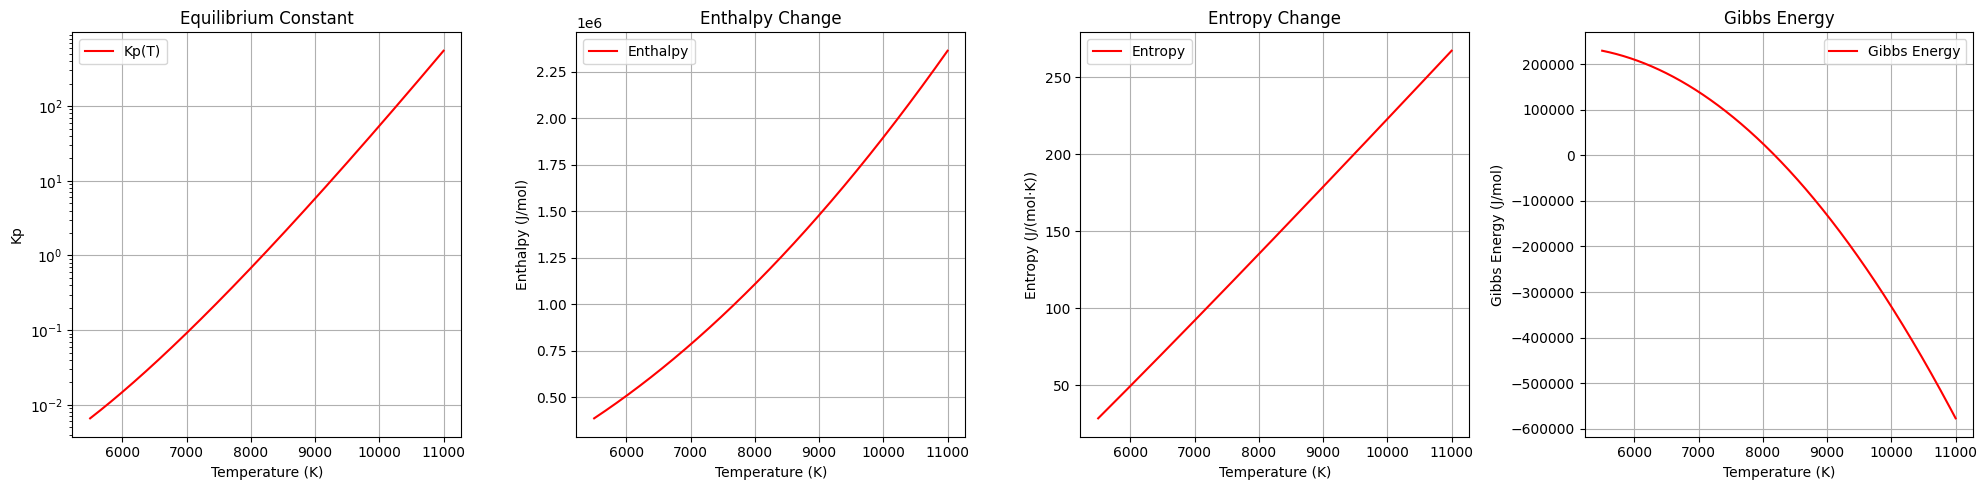

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import R

# Properties of reaction components
reaction_components = {
    'Propene': {'A': 13.619, 'B': 0.18889, 'molecular_weight': 0.042, 'enthalpy_change': 62760, 'entropy': 267.11, 'stoichiometric_coeff': -1},
    'Propane': {'A': 10.09, 'B': 0.23946, 'molecular_weight': 0.044, 'enthalpy_change': -103910, 'entropy': 270.09, 'stoichiometric_coeff': 1},
    'Hydrogen': {'A': 27.299, 'B': 0.003266, 'molecular_weight': 0.002, 'enthalpy_change': 0, 'entropy': 130.67, 'stoichiometric_coeff': -1},
}

# Initial parameters
initial_mol_propene = 60
initial_mol_hydrogen = 40
pressure = 100000  # Pressure in Pa
standard_pressure = 101325  # Standard pressure in Pa

# Temperature range for analysis
temperature_range = np.linspace(5500, 11000, 7000)

# Total enthalpy change calculation
reaction_enthalpy = (
    reaction_components['Propene']['stoichiometric_coeff'] * reaction_components['Propene']['enthalpy_change'] +
    reaction_components['Hydrogen']['stoichiometric_coeff'] * reaction_components['Hydrogen']['enthalpy_change'] + reaction_components['Propane']['stoichiometric_coeff'] * reaction_components['Propane']['enthalpy_change']
)

# Enthalpy of each component
enthalpy_propene = reaction_components['Propene']['stoichiometric_coeff'] * (
    reaction_components['Propene']['A'] * (temperature_range - 298) + reaction_components['Propene']['B'] * (temperature_range**2 - 298**2) / 2
)
enthalpy_hydrogen = reaction_components['Hydrogen']['stoichiometric_coeff'] * (
    reaction_components['Hydrogen']['A'] * (temperature_range - 298) + reaction_components['Hydrogen']['B'] * (temperature_range**2 - 298**2) / 2
)
enthalpy_propane = reaction_components['Propane']['stoichiometric_coeff'] * (
    reaction_components['Propane']['A'] * (temperature_range - 298) + reaction_components['Propane']['B'] * (temperature_range**2 - 298**2) / 2
)
total_enthalpy = reaction_enthalpy + enthalpy_propene + enthalpy_hydrogen + enthalpy_propane

# Total entropy change calculation
reaction_entropy = (
    reaction_components['Propene']['stoichiometric_coeff'] * reaction_components['Propene']['entropy'] +
    reaction_components['Hydrogen']['stoichiometric_coeff'] * reaction_components['Hydrogen']['entropy'] + reaction_components['Propane']['stoichiometric_coeff'] * reaction_components['Propane']['entropy']
)

# Entropy of each component
entropy_propene = reaction_components['Propene']['stoichiometric_coeff'] * (
    reaction_components['Propene']['A'] * np.log(temperature_range / 298) + reaction_components['Propene']['B'] * (temperature_range - 298)
)
entropy_hydrogen = reaction_components['Hydrogen']['stoichiometric_coeff'] * (
    reaction_components['Hydrogen']['A'] * np.log(temperature_range / 298) + reaction_components['Hydrogen']['B'] * (temperature_range - 298)
)
entropy_propane = reaction_components['Propane']['stoichiometric_coeff'] * (
    reaction_components['Propane']['A'] * np.log(temperature_range / 298) + reaction_components['Propane']['B'] * (temperature_range - 298)
)
total_entropy = reaction_entropy + entropy_propene + entropy_hydrogen + entropy_propane

# Gibbs energy for the reaction
reaction_gibbs_energy = total_enthalpy - total_entropy * temperature_range

# Equilibrium constant
equilibrium_constant = np.exp(-reaction_gibbs_energy / (R * temperature_range))

# Plotting graphs
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Equilibrium constant
axes[0].set_title('Equilibrium Constant')
axes[0].set_xlabel('Temperature (K)')
axes[0].set_ylabel('Kp')

axes[0].semilogy(temperature_range, equilibrium_constant, label='Kp(T)', color='red')

axes[0].legend()
axes[0].grid(True)

# Enthalpy
axes[1].set_title('Enthalpy Change')
axes[1].set_xlabel('Temperature (K)')
axes[1].set_ylabel('Enthalpy (J/mol)')

axes[1].plot(temperature_range, total_enthalpy, label='Enthalpy', color='red')

axes[1].legend()
axes[1].grid(True)

# Entropy
axes[2].set_title('Entropy Change')
axes[2].set_xlabel('Temperature (K)')
axes[2].set_ylabel('Entropy (J/(mol·K))')

axes[2].plot(temperature_range, total_entropy, label='Entropy', color='red')

axes[2].legend()
axes[2].grid(True)

# Gibbs Energy
axes[3].set_title('Gibbs Energy')
axes[3].set_xlabel('Temperature (K)')
axes[3].set_ylabel('Gibbs Energy (J/mol)')

axes[3].plot(temperature_range, reaction_gibbs_energy, label='Gibbs Energy', color='red')

axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()

In [20]:
# Bisection method for finding roots
def bisection_method(equation, lower_bound, upper_bound):
    max_iterations = 2000
    tolerance = 0.001

    iteration = 0
    while iteration < max_iterations:
        midpoint = (lower_bound + upper_bound) / 2
        midpoint_value = equation(midpoint)

        if abs(midpoint_value) < tolerance:
            return midpoint

        if equation(lower_bound) * midpoint_value < 0:
            upper_bound = midpoint
        else:
            lower_bound = midpoint

        iteration += 1

    return (lower_bound + upper_bound) / 2

# Function to compute reaction value
def reaction_function(x, equilibrium_constant):
    return (
        (((initial_mol_propene + float(reaction_components['Propene']['stoichiometric_coeff']) * x) ** reaction_components['Propene']['stoichiometric_coeff']) * 
         ((initial_mol_hydrogen + float(reaction_components['Hydrogen']['stoichiometric_coeff']) * x) ** reaction_components['Hydrogen']['stoichiometric_coeff']) * 
         ((0 + float(reaction_components['Propane']['stoichiometric_coeff']) * x) ** reaction_components['Propane']['stoichiometric_coeff']))/((100 + (-1) * x)**(-1)) - equilibrium_constant / ((standard_pressure/pressure)**(-1))
    )

reaction_roots = []

for constant in equilibrium_constant:
    try:
        # Define the initial interval for root finding
        lower_limit = 0  # Lower bound
        upper_limit = 42.6  # Upper bound

        # Define the function within the loop to pass the equilibrium constant
        def target_function(variable):
            return reaction_function(variable, constant)

        # Find root using the bisection method
        root = bisection_method(target_function, lower_limit, upper_limit)
        reaction_roots.append(root)  # Save the found root

    except ValueError as error:
        # Handle errors for invalid intervals
        continue

reaction_roots = np.array(reaction_roots)

# Compute the common denominator for r
denom_r_values = (
    (initial_mol_propene + reaction_components['Propene']['stoichiometric_coeff'] * reaction_roots) +
    (0 + reaction_components['Propane']['stoichiometric_coeff'] * reaction_roots) +
    (initial_mol_hydrogen + reaction_components['Hydrogen']['stoichiometric_coeff'] * reaction_roots)
)

# Calculate r for each component
r_propene = (initial_mol_propene + reaction_roots * reaction_components['Propene']['stoichiometric_coeff']) / denom_r_values
r_propane = (0 + reaction_roots * reaction_components['Propane']['stoichiometric_coeff']) / denom_r_values
r_hydrogen = (initial_mol_hydrogen + reaction_roots * reaction_components['Hydrogen']['stoichiometric_coeff']) / denom_r_values

# Compute the common denominator for g
denom_g_values = (
    reaction_components['Propene']['molecular_weight'] * r_propene +
    reaction_components['Propane']['molecular_weight'] * r_propane +
    reaction_components['Hydrogen']['molecular_weight'] * r_hydrogen
)

# Calculate g for each component
g_propene = r_propene * reaction_components['Propene']['molecular_weight'] / denom_g_values
g_propane = r_propane * reaction_components['Propane']['molecular_weight'] / denom_g_values
g_hydrogen = r_hydrogen * reaction_components['Hydrogen']['molecular_weight'] / denom_g_values


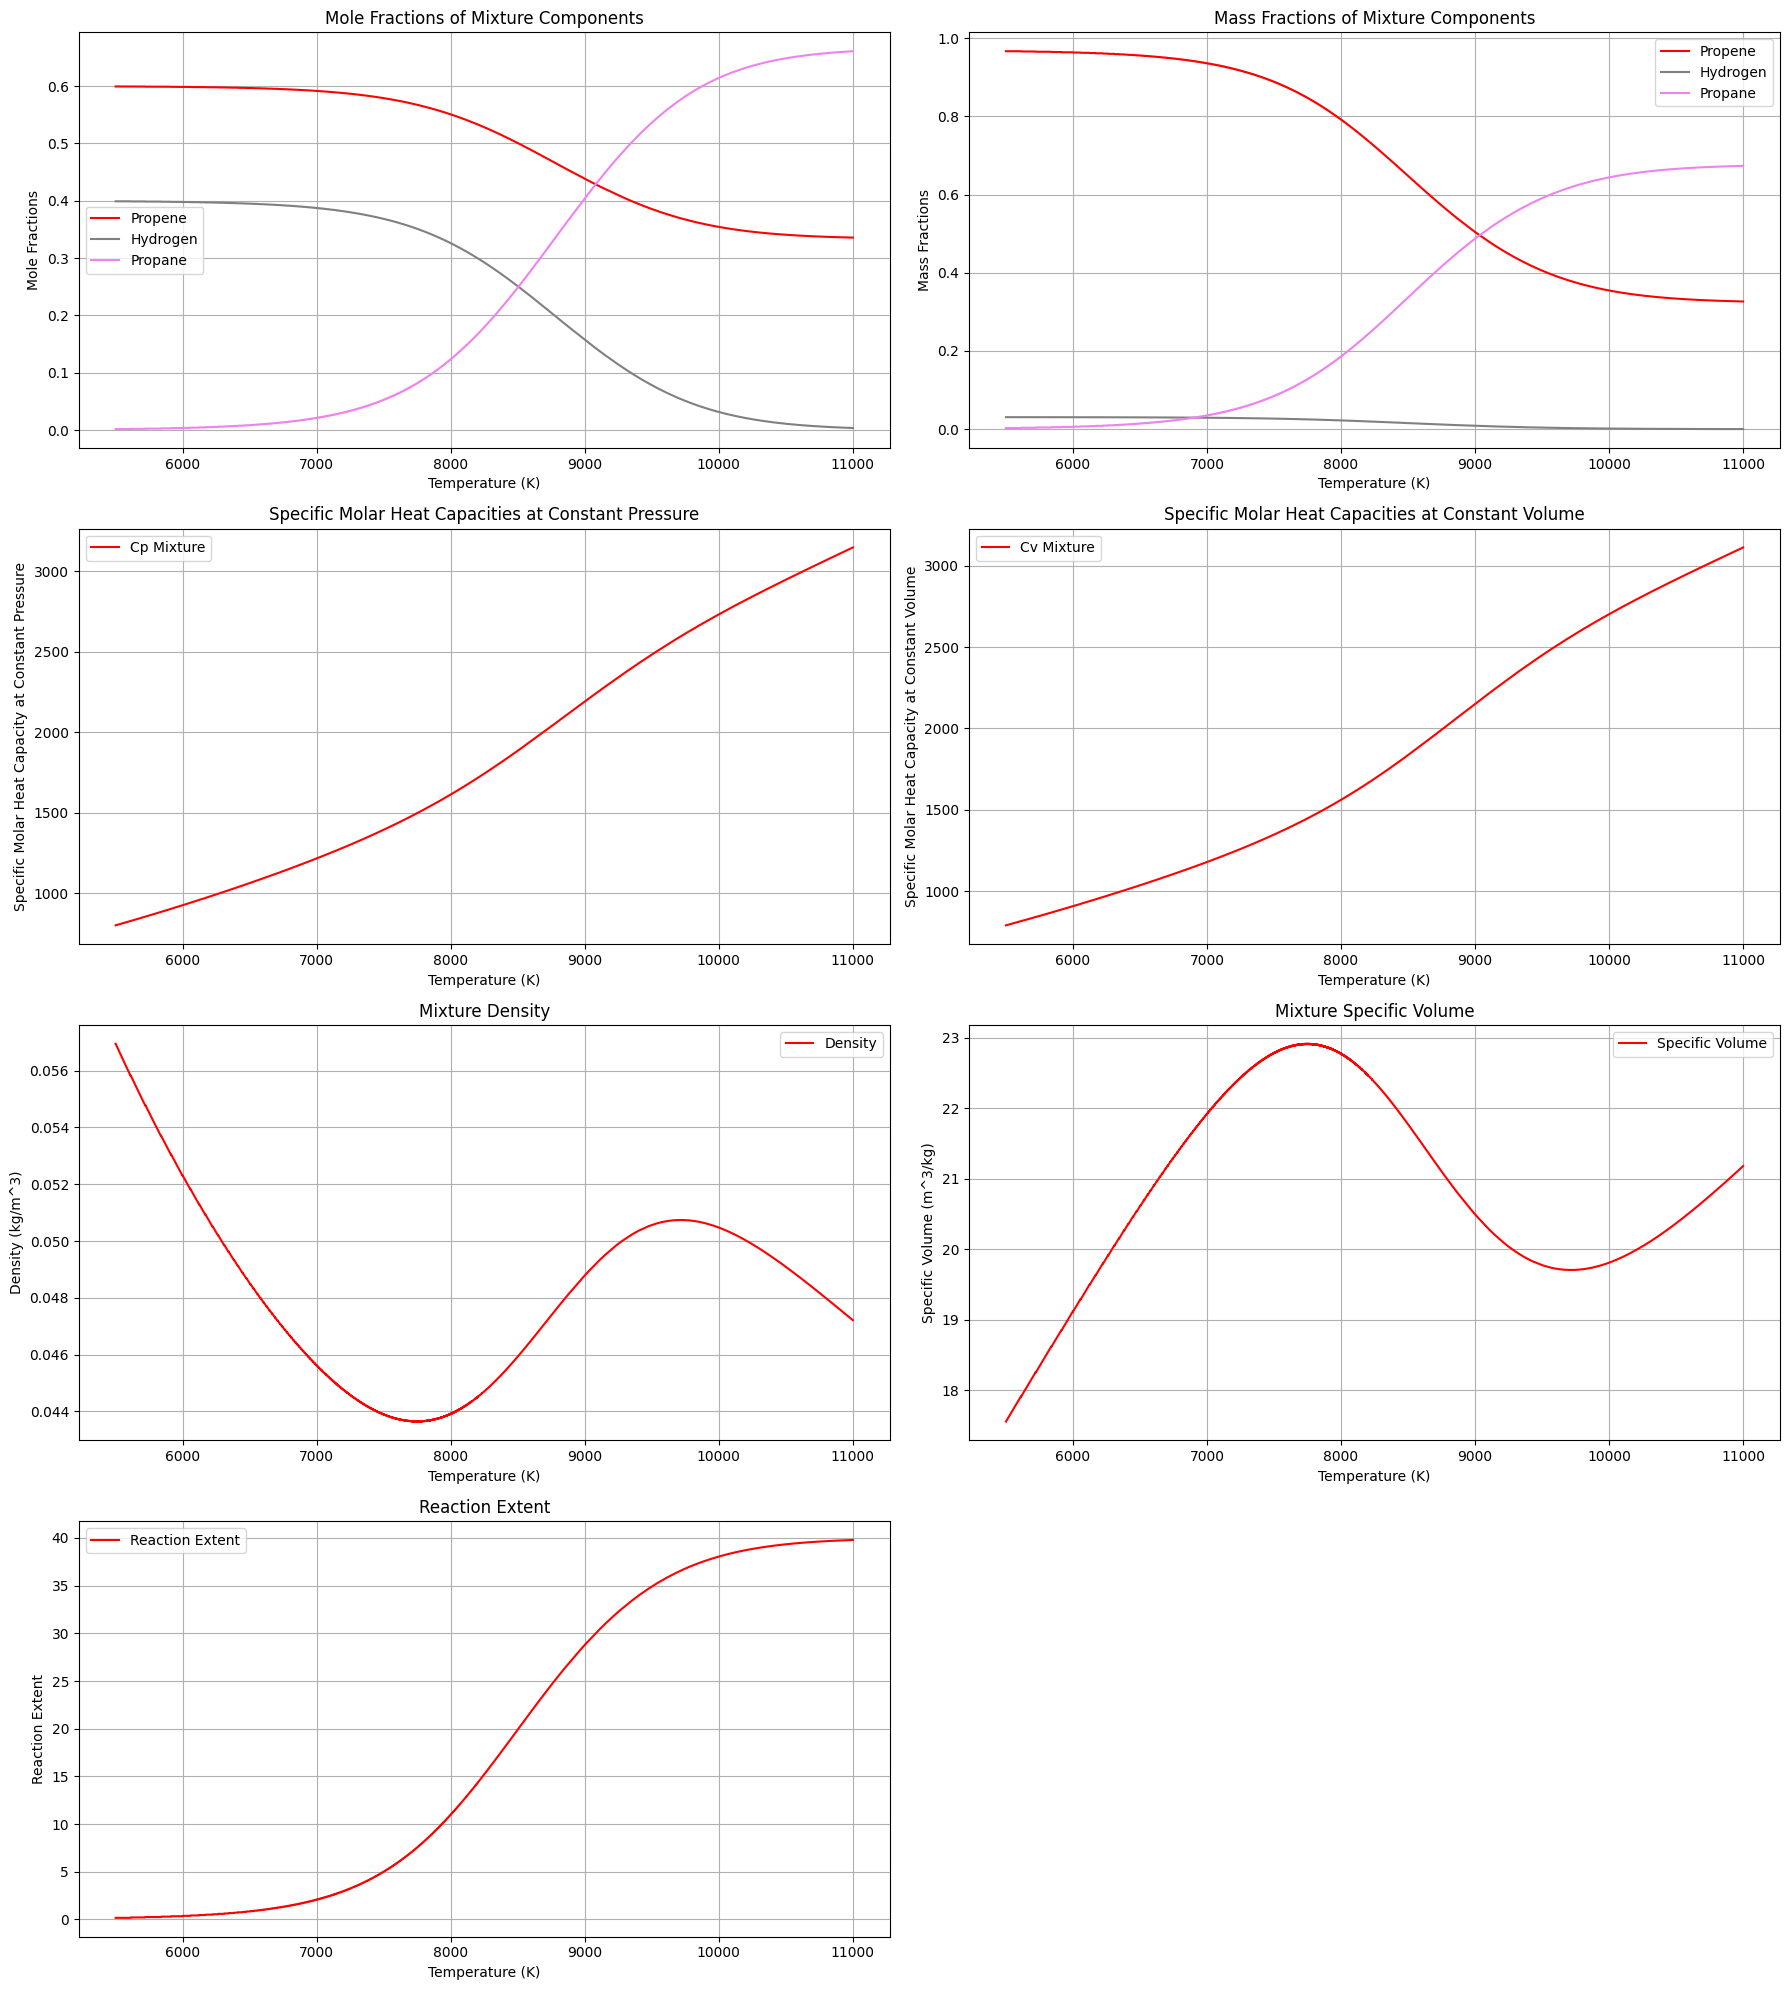

In [24]:
# Calculation of specific heat capacities
cp_propene = reaction_components['Propene']['A'] + reaction_components['Propene']['B'] * temperature_range
cp_hydrogen = reaction_components['Hydrogen']['A'] + reaction_components['Hydrogen']['B'] * temperature_range
cp_propane = reaction_components['Propane']['A'] + reaction_components['Propane']['B'] * temperature_range

cv_propene = cp_propene - R
cv_hydrogen = cp_hydrogen - R
cv_propane = cp_propane - R

cp_weighted = r_propene * cp_propene + r_hydrogen * cp_hydrogen + r_propane * cp_propane
cv_weighted = r_propene * cv_propene + r_hydrogen * cv_hydrogen + r_propane * cv_propane

delta_u = total_enthalpy - sum(reaction_components[comp]['stoichiometric_coeff'] * R * temperature_range for comp in reaction_components)

cp_reaction = total_enthalpy**2 / (R * temperature_range**2) * (sum((reaction_components[comp]['stoichiometric_coeff']**2) / r_propene for comp in reaction_components) - 1)**(-1)
cv_reaction = delta_u**2 / (R * temperature_range**2) * (sum((reaction_components[comp]['stoichiometric_coeff']**2) / r_propene for comp in reaction_components))**(-1)

cp_mixture = cp_weighted + cp_reaction
cv_mixture = cv_weighted + cv_reaction

# Mixture density and specific volume
gas_constant_mixture = R / denom_g_values
density = pressure / (gas_constant_mixture * temperature_range)
specific_volume = 1 / density

# Add Reaction Extent Plot
fig, axes = plt.subplots(4, 2, figsize=(18, 20))  # Increase the grid to accommodate one more plot

# Mole fractions
axes[0, 0].set_title('Mole Fractions of Mixture Components')
axes[0, 0].set_xlabel('Temperature (K)')
axes[0, 0].set_ylabel('Mole Fractions')

axes[0, 0].plot(temperature_range, r_propene, label='Propene', color='red')
axes[0, 0].plot(temperature_range, r_hydrogen, label='Hydrogen', color='grey')
axes[0, 0].plot(temperature_range, r_propane, label='Propane', color='violet')

axes[0, 0].legend()
axes[0, 0].grid(True)

# Mass fractions
axes[0, 1].set_title('Mass Fractions of Mixture Components')
axes[0, 1].set_xlabel('Temperature (K)')
axes[0, 1].set_ylabel('Mass Fractions')

axes[0, 1].plot(temperature_range, g_propene, label='Propene', color='red')
axes[0, 1].plot(temperature_range, g_hydrogen, label='Hydrogen', color='grey')
axes[0, 1].plot(temperature_range, g_propane, label='Propane', color='violet')

axes[0, 1].legend()
axes[0, 1].grid(True)

# Specific heat capacities at constant pressure
axes[1, 0].set_title('Specific Molar Heat Capacities at Constant Pressure')
axes[1, 0].set_xlabel('Temperature (K)')
axes[1, 0].set_ylabel('Specific Molar Heat Capacity at Constant Pressure')

axes[1, 0].plot(temperature_range, cp_mixture, label='Cp Mixture', color='red')

axes[1, 0].legend()
axes[1, 0].grid(True)

# Specific heat capacities at constant volume
axes[1, 1].set_title('Specific Molar Heat Capacities at Constant Volume')
axes[1, 1].set_xlabel('Temperature (K)')
axes[1, 1].set_ylabel('Specific Molar Heat Capacity at Constant Volume')

axes[1, 1].plot(temperature_range, cv_mixture, label='Cv Mixture', color='red')

axes[1, 1].legend()
axes[1, 1].grid(True)

# Mixture density
axes[2, 0].set_title('Mixture Density')
axes[2, 0].set_xlabel('Temperature (K)')
axes[2, 0].set_ylabel('Density (kg/m^3)')

axes[2, 0].plot(temperature_range, density, label='Density', color='red')

axes[2, 0].legend()
axes[2, 0].grid(True)

# Mixture specific volume
axes[2, 1].set_title('Mixture Specific Volume')
axes[2, 1].set_xlabel('Temperature (K)')
axes[2, 1].set_ylabel('Specific Volume (m^3/kg)')

axes[2, 1].plot(temperature_range, specific_volume, label='Specific Volume', color='red')

axes[2, 1].legend()
axes[2, 1].grid(True)

# Reaction extent
axes[3, 0].set_title('Reaction Extent')
axes[3, 0].set_xlabel('Temperature (K)')
axes[3, 0].set_ylabel('Reaction Extent')

axes[3, 0].plot(temperature_range[:len(reaction_roots)], reaction_roots, label='Reaction Extent', color='red')

axes[3, 0].legend()
axes[3, 0].grid(True)
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()
